< 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) >

참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 캐글을 시작한지 두 달정도 된 초보자로, 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

#데이터 파일

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
question = pd.read_csv('./data/schema.csv')
question.shape

(290, 3)

In [5]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [8]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('./data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [10]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

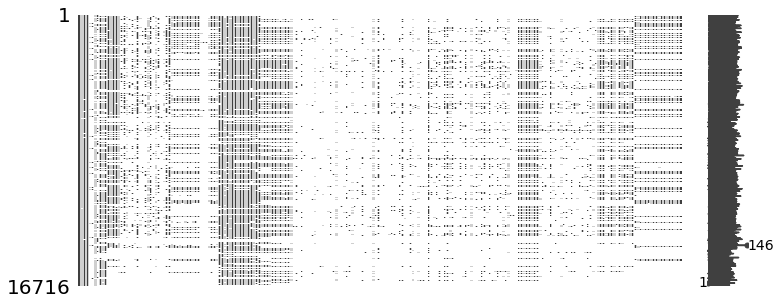

In [11]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

* 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# **설문통계**

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

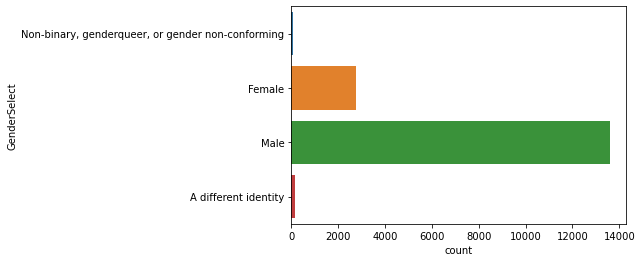

In [12]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [ ]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

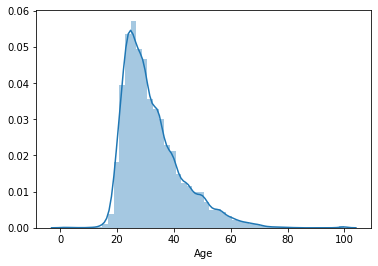

In [ ]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.

#학력

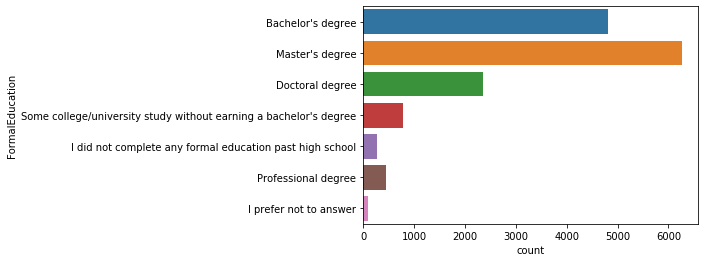

In [ ]:
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다.

In [ ]:
pd.DataFrame(
    mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


#전공

In [ ]:
# value_counts 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다. 
# normalize=True 옵션을 사용하면, 
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

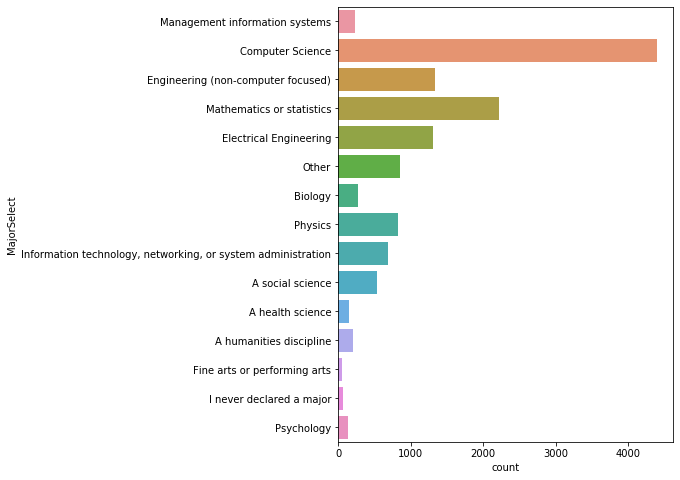

In [ ]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

#취업 여부

In [ ]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


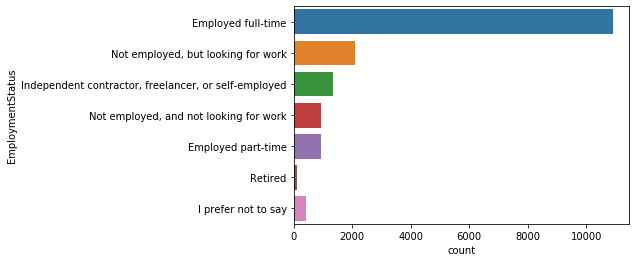

In [ ]:
sns.countplot(y='EmploymentStatus', data=mcq)

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

#프로그래밍 경험

* 'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

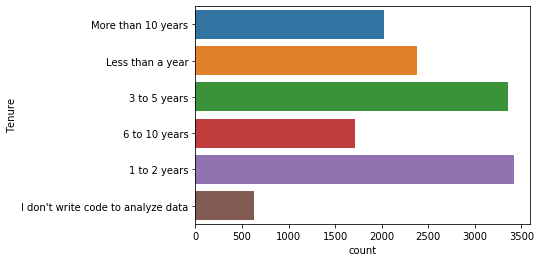

In [ ]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


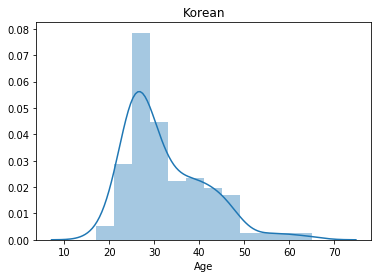

In [ ]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

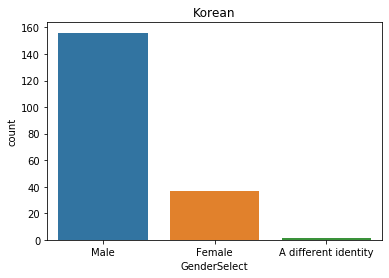

In [ ]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

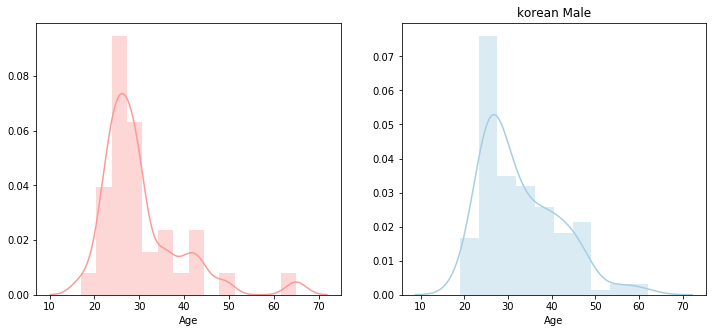

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

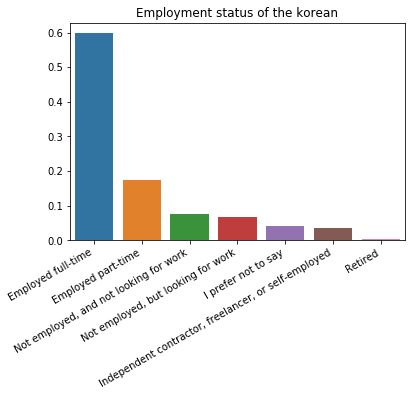

In [ ]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

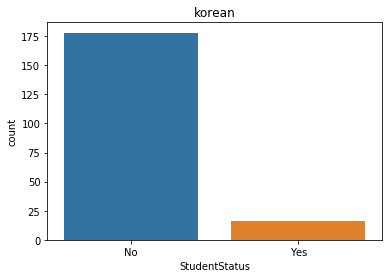

In [ ]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [ ]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
